# Meshing examples

### Imports and set domain

In [1]:
from MeshLib import MeshLib as ml

domain = [(0, 0), (1, 0), (1, 1), (0, 1)]

2023-12-04 20:24:11.847248: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 20:24:11.850592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 20:24:11.896425: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 20:24:11.897769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 20:24:12.737130: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

MeshLib imported



### Base case

#### Generate simple mesh and simple refinement

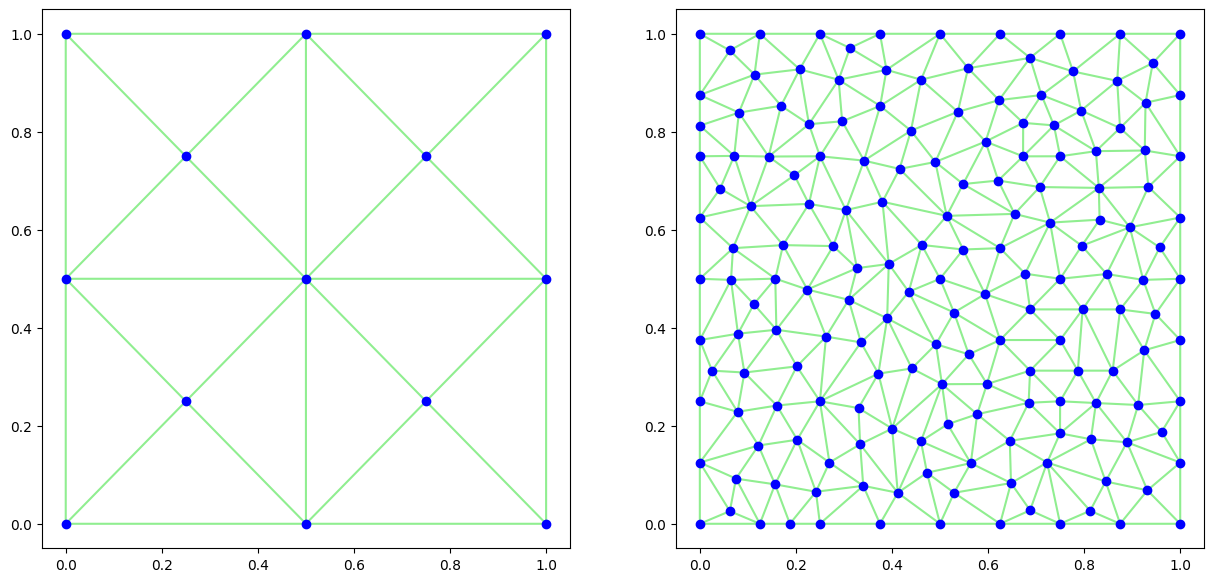

In [2]:
# generate_mesh can be used to initialise a mesh on a domain
mesh = ml.generate_mesh(domain, 0.1)

# refine_mesh can be used to initialise a mesh while preserving nodes of a previous mesh
refined_mesh = ml.refine_mesh(mesh, 0.005)

# compare is used to (obviously) compare meshes, can be presented side-by-side (below)
ml.compare(mesh, refined_mesh, side_by_side=True)

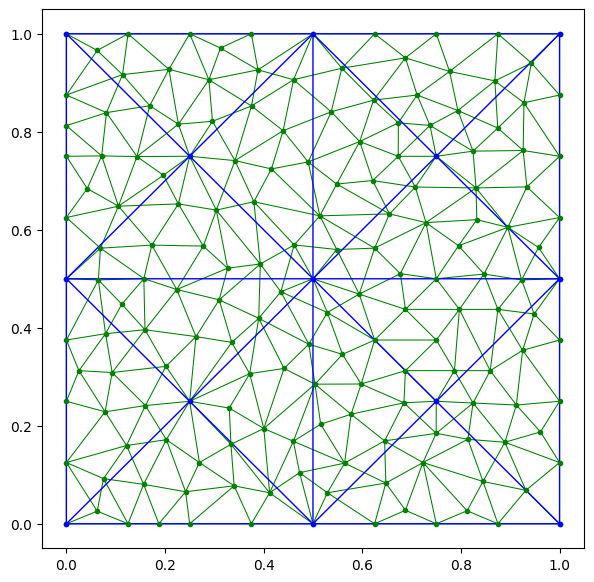

In [3]:
# compare can also be used to lay meshes over each other as shown below
ml.compare(mesh, refined_mesh, side_by_side=False)

# if you want the order of meshes to be switched in the plot, just swap the arguments

#### Check assignment of little triangles

In [4]:
# Given two meshes, we can create a map in both directions 
ltob, btol = refined_mesh.assign_to_big_triangles(mesh, plot=True)

# ltob (little to big) will give the index of the big triangle,
# when given the index of a little triangle

# when plot is set to True in the function call, then we can see the assignment visually

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

In [ ]:
# And then the maps are explained explicitly in this block

print(f"Map from little triangles to big triangles:")
print(f"1D list of size = (#little triangles)\n")
print(f"{ltob}\n")
print(f"\t Usage: ltob[ID of little triangle] = ID of its big triangle\n")
print()
print(f"Map from big triangles to little triangles:")
print(f"2D list of size = (#big triangles, #little triangles per big triangle)\n")
print(f"{btol}\n")
print(f"\t Usage: btol[ID of big triangle] = ID of all little triangles it contains")

Map from little triangles to big triangles:
1D list of size = (#little triangles)

[ 0  5 10  2  4  4  4 13  1 12 13  5 12 13  0  4 12  9  4  0  0  0  0  0
 12 12  0  0 12 12  9 13  9 12 13 13  0  9 12 13 12  9  4  0  4  4  5 15
  4  4  4  4  5  5  4  4 15 15  0  4  5  4  5 15  5  5 11  1  5  4  5  1
  1 14 11  8 15  1  5  5 15  4  4 15 15  4 15  5  5  5  6  5  5  6  8  6
  5  6  6  6  6  5  0 15  0 12  0  0 13 12 12 13 13 10 14 14  1  3  8  6
  1  5  0  0 15 14 14 14 14 14 14 12 12  9  9  9 10 13 12  9  9  7  7  7
  9 10 13 12 12  7  9 13 13  7 11 10  7  7 13  7 13  7  7  9  9  7  7 13
 13 10  2 10 13  2 13  2 10  2  2 10 10  2  2  3  2 11  2  3  2 10 10  3
 10 10  2  3  3  3 11  2  3  2  3  3  3  3  3 11  3 11 11  1  1 11 11  8
  8 11 11 11 11 11 10  3  3  1  1 11  8  8  1  8  8 11 11 10 13 11 11  1
  8  1  1  8  8  8  6  8  8  6  6  8  8  6  6  8  6 13 12 15 15 15 14 15
 15 14 14 14 14 14 15 14 15 14 14  0  7  7  7  9  7  7  7  9  9  7  9  3
  3  2  2  2  3  6  3  8  8  6  6  6  6 1

### Segmentation case

#### Generate simple mesh and refine in segments

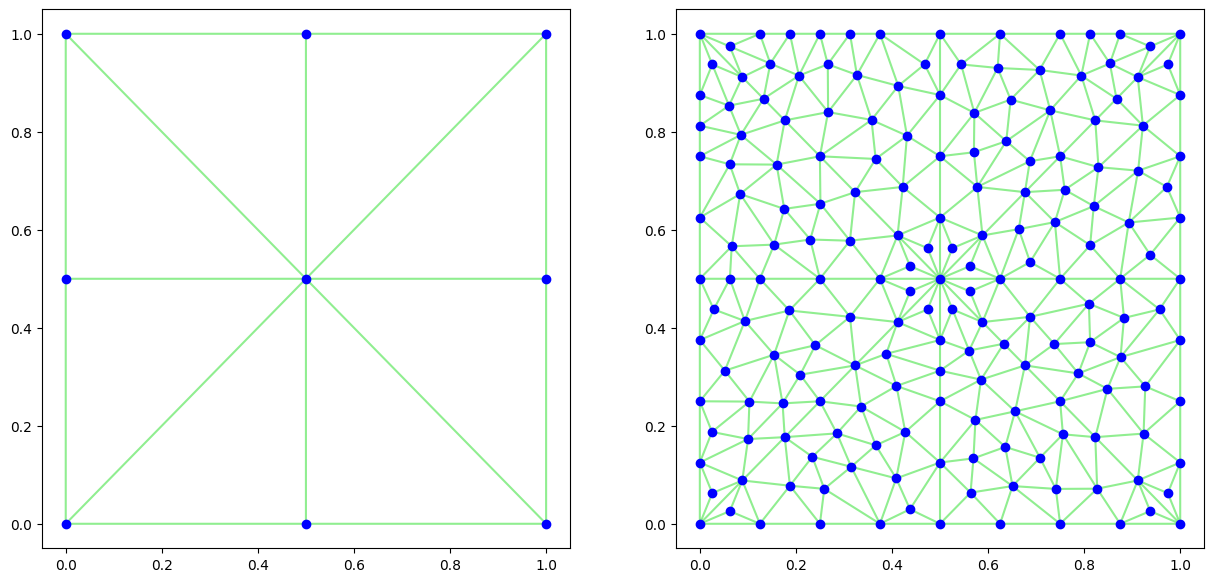

In [5]:
# The difference in this example is that the segmentation flag is set to True
# This means that the refinement will be done within each segment
mesh = ml.generate_mesh(domain, 0.2)
refined_mesh_seg = ml.refine_mesh(mesh, 0.005, segmentation=True)
ml.compare(mesh, refined_mesh_seg)

#### Check assignment of little triangles

In [6]:
# As you can see, compared to the previous case, this means that the finer mesh sits
# well within the coarser mesh

ltob, btol = refined_mesh_seg.assign_to_big_triangles(mesh, plot=True)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

### Regular mesh chain case

#### Generate chain

In [45]:
# This function creates a chain of meshes that are refined regularly via triangle splitting
# depth indicated the length of the chain
mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)

# If you want to see the plots in the chain, set the plot arg to True

#### Compare two meshes in the chain

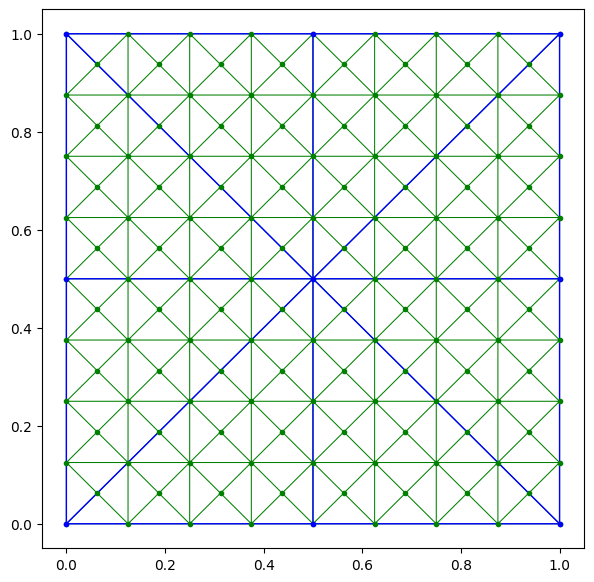

ratio =  5.656854249492381
h =  0.125


In [54]:
# Then we can see, meshes of the chain can be taken from the list as below and compared
index=2

ml.compare(mesh_chain[index], mesh_chain[index+5],False)

print('ratio = ',mesh_chain[index].h_max /mesh_chain[index+5].h_max)
print('h = ',mesh_chain[index+5].h_max)


#### Check assignment between two meshes in the chain

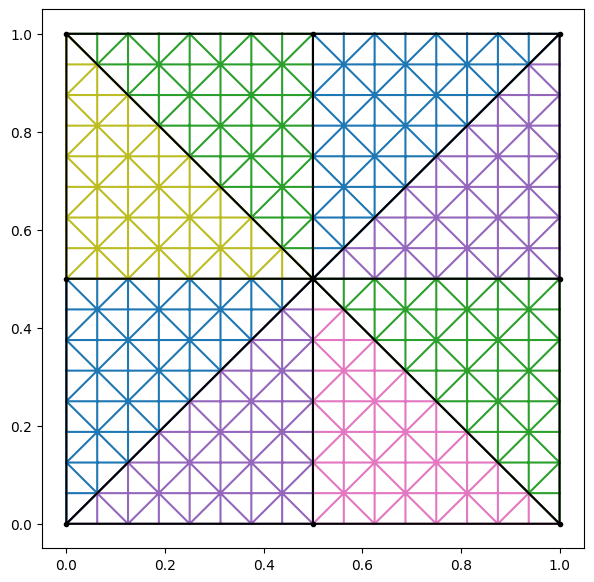

In [10]:
coarse_mesh = mesh_chain[2]
fine_mesh = mesh_chain[8]

# Also this chained refinement approach yields nice regular meshed that nest well

ltob, btol = fine_mesh.assign_to_big_triangles(coarse_mesh, plot=True)

In [14]:
btol

array([[  0,   9,  17,  25,  32,  33,  49,  59,  64,  65,  72,  81,  82,
         95, 110, 117, 128, 129, 146, 147, 162, 163, 172, 176, 178, 179,
        203, 216, 220, 221, 234, 235, 256, 257, 274, 275, 290, 291, 306,
        307, 320, 321, 322, 350, 351, 368, 369, 378, 379, 393, 394, 420,
        421, 439, 440, 441, 457, 458, 470, 473, 476, 477, 494, 506],
       [  1,  11,  19,  27,  34,  35,  51,  56,  66,  67,  74,  84,  85,
        111, 119, 125, 130, 131, 150, 151, 166, 167, 180, 182, 183, 207,
        223, 224, 225, 236, 237, 250, 258, 259, 278, 279, 294, 295, 310,
        311, 323, 324, 325, 354, 355, 365, 380, 381, 382, 383, 396, 397,
        422, 423, 432, 433, 443, 461, 462, 478, 479, 497, 507, 511],
       [  2,  13,  21,  29,  36,  37,  53,  60,  68,  69,  76,  87,  88,
        112, 121, 127, 132, 133, 154, 155, 170, 171, 184, 186, 187, 211,
        227, 228, 229, 238, 239, 254, 260, 261, 282, 283, 298, 299, 314,
        315, 326, 327, 328, 358, 359, 371, 384, 385, 386, 3

## Other

In [11]:
# Simple mesh summary
coarse_mesh.summary()

Mesh summary:
 - #nodes: 9
 - #edges: 16
 - #triangles: 8
-------------------------
 - h_min: 0.5
 - h_max: 0.7071067811865476
 - h_avg: 0.5517766952966369
-------------------------


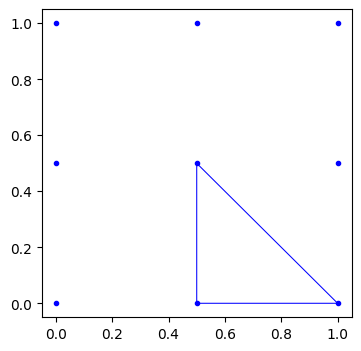

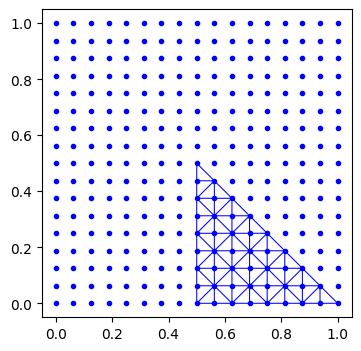

In [ ]:
# These cells are just to show the use of the btol, ltob maps

# So here we see by specifying the big triangle number
# we can find all the little triangles it contains

id = 3
coarse_mesh.plot(triangles=[id])
fine_mesh.plot(triangles=btol[id])

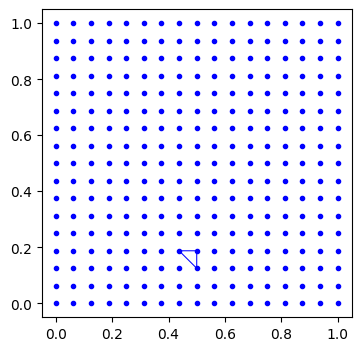

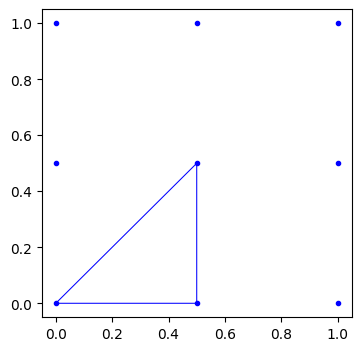

In [ ]:
# Similarly in this example, we see that given a little triangle
# we can find the big triangle it is in

# Give random id of little triangle
id = 143

fine_mesh.plot(triangles=[id])
coarse_mesh.plot(triangles=[ltob[id]])

In [ ]:
# Also just to show how the data of the mesh is accessed
coarse_mesh.vertices
coarse_mesh.edges
coarse_mesh.triangles
coarse_mesh.vertex_markers
coarse_mesh.edge_markers
# ...etc


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)